## 파일불러온 후 spilt

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('C:/Users/lucky/바탕 화면/Capstone-Design/processed_data_2.xlsx',header=0)

In [3]:
data

,mod_d,region,town_t,apt_t,psu,sex,age,incm,ho_incm,incm5,...,LS_1YR,LK_EDU,LK_LB_CO,LK_LB_US,LK_LB_IT,LK_LB_EF,LF_secur_y,LF_BUYER,LF_SAFE,target
0,2020.03.05.,1,1,2,A901,1,80,1,1,2,...,1,2,1,2,88,8,1,2,1,저
1,2020.03.05.,1,1,2,A901,1,78,4,4,5,...,1,2,2,8,88,8,1,1,1,고
2,2020.03.05.,1,1,2,A901,2,75,4,4,5,...,2,2,2,8,88,8,1,1,1,고
3,2020.03.05.,1,1,2,A901,2,80,2,1,2,...,1,2,2,8,88,8,1,1,1,고
4,2020.03.05.,1,1,2,A901,2,71,1,1,2,...,2,1,2,8,88,8,1,1,1,저
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6073,2020.03.05.,8,1,2,R904,1,1,3,3,4,...,1,3,3,8,88,8,1,1,1,저
6074,2020.03.05.,8,1,2,R904,2,73,2,1,2,...,2,2,1,2,88,8,1,1,1,저
6075,2020.03.05.,8,1,2,R904,1,43,3,4,4,...,2,2,1,2,88,8,1,1,2,고
6076,2020.03.05.,8,1,2,R904,1,10,3,4,4,...,2,2,2,8,88,8,1,1,2,고


In [4]:
is_high = data['target'] == '3'

# 조건를 충족하지 않는 데이터를 필터링하여 새로운 변수에 저장합니다.
subset_df = data[is_high]

# 결과를 출력합니다.
print(subset_df.shape)

(4293, 368)


In [5]:
is_middle = data['target'] == '2'

# 조건를 충족하지 않는 데이터를 필터링하여 새로운 변수에 저장합니다.
subset_df = data[is_middle]

# 결과를 출력합니다.
print(subset_df.shape)

(760, 368)


In [6]:
is_low = data['target'] == '1'

# 조건를 충족하지 않는 데이터를 필터링하여 새로운 변수에 저장합니다.
subset_df = data[is_low]

# 결과를 출력합니다.
print(subset_df.shape)

(1025, 368)


In [7]:
data.drop(['mod_d'], axis='columns', inplace=True)

In [8]:
data.drop(['psu'], axis='columns', inplace=True)

In [9]:
from sklearn.ensemble import RandomForestClassifier #분류트리(모델) 
from sklearn.model_selection import train_test_split # train / test
from sklearn.metrics import accuracy_score, confusion_matrix # 평가 : 분류정확도 
from sklearn.metrics import classification_report # 평가 : 정확률, 재현율, f1_score

In [10]:
# 1. train/test
X = data.drop(['target'], axis=1)
y = data['target']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
X_train

,region,town_t,apt_t,sex,age,incm,ho_incm,incm5,ho_incm5,edu,...,L_DN_WHO,LS_1YR,LK_EDU,LK_LB_CO,LK_LB_US,LK_LB_IT,LK_LB_EF,LF_secur_y,LF_BUYER,LF_SAFE
4849,13,2,1,1,44,1,2,1,2,3,...,8,2,2,1,2,88,8,1,1,1
4442,11,2,1,2,64,3,3,3,3,2,...,8,2,2,1,2,88,8,1,1,2
4381,10,1,2,2,53,1,2,1,2,1,...,8,1,2,2,8,88,8,1,1,2
1002,1,1,1,1,33,4,4,4,5,4,...,2,1,2,1,2,88,8,1,1,2
5102,14,1,2,2,40,3,3,3,4,3,...,1,2,2,1,1,3,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,14,1,1,1,64,2,2,2,3,1,...,1,2,2,1,2,88,8,1,2,1
190,1,1,2,2,7,3,3,3,4,1,...,2,1,2,2,8,88,8,1,1,1
6002,8,2,2,2,38,1,2,2,3,4,...,1,1,2,1,1,9,1,1,1,1
4130,9,1,1,1,48,2,3,2,3,3,...,2,2,2,2,8,88,8,1,1,1


In [13]:
X_test

,region,town_t,apt_t,sex,age,incm,ho_incm,incm5,ho_incm5,edu,...,L_DN_WHO,LS_1YR,LK_EDU,LK_LB_CO,LK_LB_US,LK_LB_IT,LK_LB_EF,LF_secur_y,LF_BUYER,LF_SAFE
5529,16,2,2,1,23,4,4,5,5,3,...,1,2,2,1,2,88,8,1,1,1
1662,3,1,2,2,46,1,2,2,3,4,...,8,1,2,1,2,88,8,1,1,1
5985,8,2,1,2,62,3,2,3,3,1,...,1,1,2,2,8,88,8,1,1,1
527,1,1,2,2,25,4,4,5,5,4,...,1,1,2,1,1,1,1,1,1,1
2089,4,1,2,2,65,2,1,2,2,1,...,8,1,2,2,8,88,8,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2877,9,1,2,1,19,2,2,2,3,3,...,1,1,2,1,2,88,8,1,1,1
1830,4,1,2,2,19,3,3,4,4,3,...,1,2,2,1,2,88,8,1,1,1
1582,3,1,2,2,58,3,3,4,4,2,...,1,2,2,1,2,88,8,1,1,2
1779,3,1,1,1,80,1,1,1,1,1,...,8,2,2,2,8,88,8,1,1,2


In [14]:
y_train

4849    고
4442    고
4381    고
1002    고
5102    고
       ..
4993    고
190     저
6002    고
4130    고
3920    중
Name: target, Length: 4254, dtype: object

In [15]:
y_test

5529    고
1662    고
5985    고
527     고
2089    고
       ..
2877    고
1830    중
1582    저
1779    고
2702    저
Name: target, Length: 1824, dtype: object

## decision tree

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [17]:
dt_clf = DecisionTreeClassifier(random_state=156)

In [18]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [19]:
pred = dt_clf.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, pred)

In [21]:
print('Decision Tree 예측 정확도 : {0:.4f}'.format(accuracy))
print('\nDecisionTreeClassifier 기본 하이퍼파라미터:\n', dt_clf.get_params())

Decision Tree 예측 정확도 : 0.5850

DecisionTreeClassifier 기본 하이퍼파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


### - 하이퍼파라미터 튜닝

In [33]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [5,6,7,8,9,10]
         }

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라미터: ', grid_cv.best_params_)

# GridSearchCV 객체의 cv_results_ 속성을 데이터 프레임으로 생성
scores_df = pd.DataFrame(grid_cv.cv_results_)
scores_df[['rank_test_score', 'params','mean_test_score',  'split0_test_score',
           'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']]

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GridSearchCV 최고 평균 정확도 수치: 0.7210
GridSearchCV 최적 하이퍼파라미터:  {'max_depth': 5}


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.5s finished


,rank_test_score,params,mean_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,1,{'max_depth': 5},0.720970,0.719154,0.715629,0.716804,0.725029,0.728235
1,2,{'max_depth': 6},0.713446,0.709753,0.710928,0.713278,0.719154,0.714118
2,3,{'max_depth': 7},0.700990,0.690952,0.708578,0.694477,0.700353,0.710588
3,4,{'max_depth': 8},0.690178,0.669800,0.706228,0.674501,0.694477,0.705882
4,5,{'max_depth': 9},0.685945,0.688602,0.695652,0.662750,0.687427,0.695294
5,6,{'max_depth': 10},0.668315,0.654524,0.685076,0.653349,0.669800,0.678824


In [34]:
# GridSearch가 아닌 별도의 테스트 데이터셋에서 max_depth별 성능 측정
max_depths = [5,6,7,8,9,10]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도 : {1:.4f}'.format(depth, accuracy))

max_depth = 5 정확도 : 0.7078
max_depth = 6 정확도 : 0.6968
max_depth = 7 정확도 : 0.6919
max_depth = 8 정확도 : 0.6815
max_depth = 9 정확도 : 0.6705
max_depth = 10 정확도 : 0.6683


In [35]:
params = {
    'max_depth' : [5,6,7,8,9,10],
    'min_samples_split' : [5,10,15,20,25,30]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라미터: ', grid_cv.best_params_)

# GridSearchCV 객체의 cv_results_ 속성을 데이터 프레임으로 생성
scores_df = pd.DataFrame(grid_cv.cv_results_)
scores_df[['rank_test_score', 'params', 'mean_test_score',  'split0_test_score', 
           'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GridSearchCV 최고 평균 정확도 수치: 0.7217
GridSearchCV 최적 하이퍼파라미터:  {'max_depth': 5, 'min_samples_split': 20}


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   15.4s finished


,rank_test_score,params,mean_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,4,"{'max_depth': 5, 'min_samples_split': 5}",0.720970,0.719154,0.714454,0.716804,0.726204,0.728235
1,4,"{'max_depth': 5, 'min_samples_split': 10}",0.720970,0.719154,0.714454,0.716804,0.726204,0.728235
2,3,"{'max_depth': 5, 'min_samples_split': 15}",0.721205,0.719154,0.715629,0.716804,0.726204,0.728235
3,1,"{'max_depth': 5, 'min_samples_split': 20}",0.721675,0.720329,0.715629,0.719154,0.725029,0.728235
4,2,"{'max_depth': 5, 'min_samples_split': 25}",0.721440,0.721504,0.713278,0.719154,0.725029,0.728235
5,6,"{'max_depth': 5, 'min_samples_split': 30}",0.720500,0.721504,0.713278,0.714454,0.725029,0.728235
6,12,"{'max_depth': 6, 'min_samples_split': 5}",0.713446,0.709753,0.710928,0.713278,0.719154,0.714118
7,11,"{'max_depth': 6, 'min_samples_split': 10}",0.713682,0.709753,0.709753,0.713278,0.720329,0.715294
8,9,"{'max_depth': 6, 'min_samples_split': 15}",0.715563,0.714454,0.713278,0.712103,0.719154,0.718824
9,7,"{'max_depth': 6, 'min_samples_split': 20}",0.716503,0.717979,0.713278,0.716804,0.715629,0.718824


In [36]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('Desicion Tree 예측 정확도: {0:.4f}'.format(accuracy))

Desicion Tree 예측 정확도: 0.7056


## feature importance

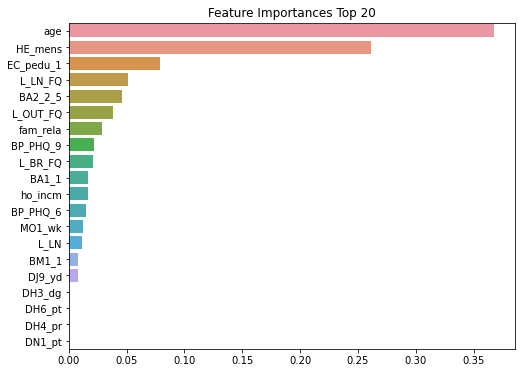

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_importance_values = best_df_clf.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
feature_top20 = feature_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 20')
sns.barplot(x=feature_top20, y=feature_top20.index)
plt.show()

In [38]:
feature_names = data.columns.tolist()

In [42]:
feature_names = feature_names[0:365]

In [43]:
target_name = np.array(['고', '중', '저'])

In [44]:
from sklearn.tree import export_graphviz

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(best_df_clf, out_file="tree.dot", class_names = target_name, 
                           feature_names = feature_names, impurity=True, filled=True)

============================최적인 Decision Tree 시각화==============================


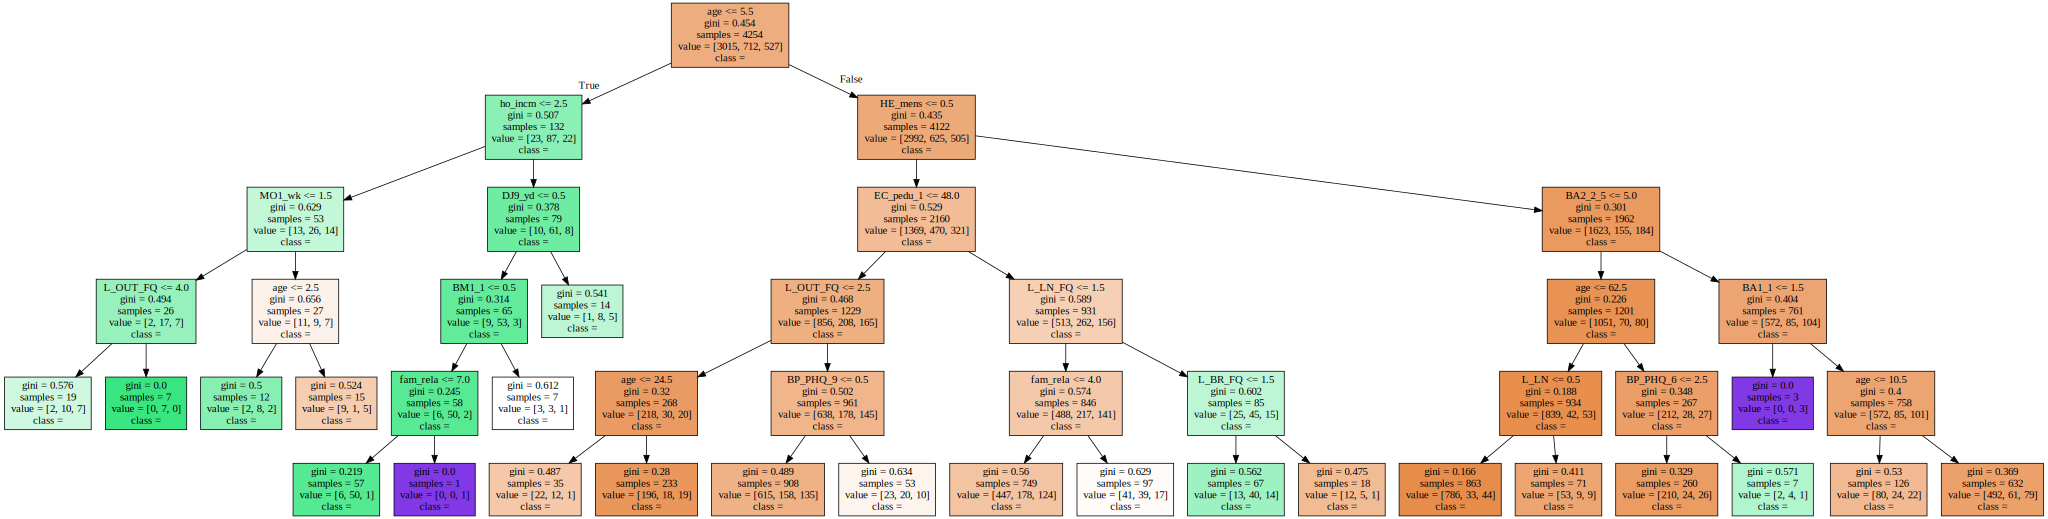

In [3]:
print('============================최적인 Decision Tree 시각화==============================')
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot", encoding='UTF8') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)